In [98]:
import pandas as pd

train_df = pd.read_csv('ML-Engineer_Task/task_train.csv', index_col=0)
train_df = train_df.drop(train_df.columns[0], axis=1)
train_df

,ID,UserID,Origin,Destination,Time,Income,Comment,Created_at,Label
0,1001034,1001513,1030,1030,9,230000,\n,2024-04-13 10:07:38.022905,0
1,1005544,1001129,631,847,42,1060000,راننده بسیار مودب بود و خوشرو بود\n,2024-04-15 12:15:10.609723,0
2,1000139,1004333,858,864,34,1250000,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,2024-04-13 02:18:36.600126,0
3,1000560,1001673,593,846,14,660000,راننده به موقع رسید\n,2024-04-13 06:00:18.870376,1
4,1008230,1002231,1018,1018,11,230000,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,2024-04-16 16:31:47.874442,0
...,...,...,...,...,...,...,...,...,...
8495,1008378,1002173,846,608,31,770000,در خودروی ایشان برای مسافران کتاب جهت مطالعه و...,2024-04-16 18:23:52.969318,0
8496,1006567,1003500,839,582,22,1110000,خیلی خوشحالم که این راننده مرا میبرد\n,2024-04-16 03:53:18.490703,0
8497,1000341,1004087,1029,1030,7,420000,فوق العاده بود\n,2024-04-13 04:17:50.174425,0
8498,1005068,1001042,602,611,15,590000,هیچ شکایتی ندارم، اما هیچ نظر مثبتی هم ندارم\n,2024-04-15 08:55:47.112620,0


In [99]:
# Calculate the number of missing values in each column of the DataFrame
null_counts = train_df.isnull().sum()

# Print the count of missing values for each column
print(null_counts)

ID             0
UserID         0
Origin         0
Destination    0
Time           0
Income         0
Comment        0
Created_at     0
Label          0
dtype: int64


In [100]:
# Calculate the number of unique values for each column in the DataFrame
unique_counts = train_df.nunique()

# Print the unique counts for each column
print(unique_counts)

ID             8488
UserID         3438
Origin           81
Destination     103
Time            116
Income          273
Comment         239
Created_at     8500
Label             2
dtype: int64


In [101]:
# Display the count of each unique value in the 'Label' column of the train_df DataFrame
target_value_counts = train_df['Label'].value_counts()

# Print the value counts
print(target_value_counts)

Label
0    8311
1     189
Name: count, dtype: int64


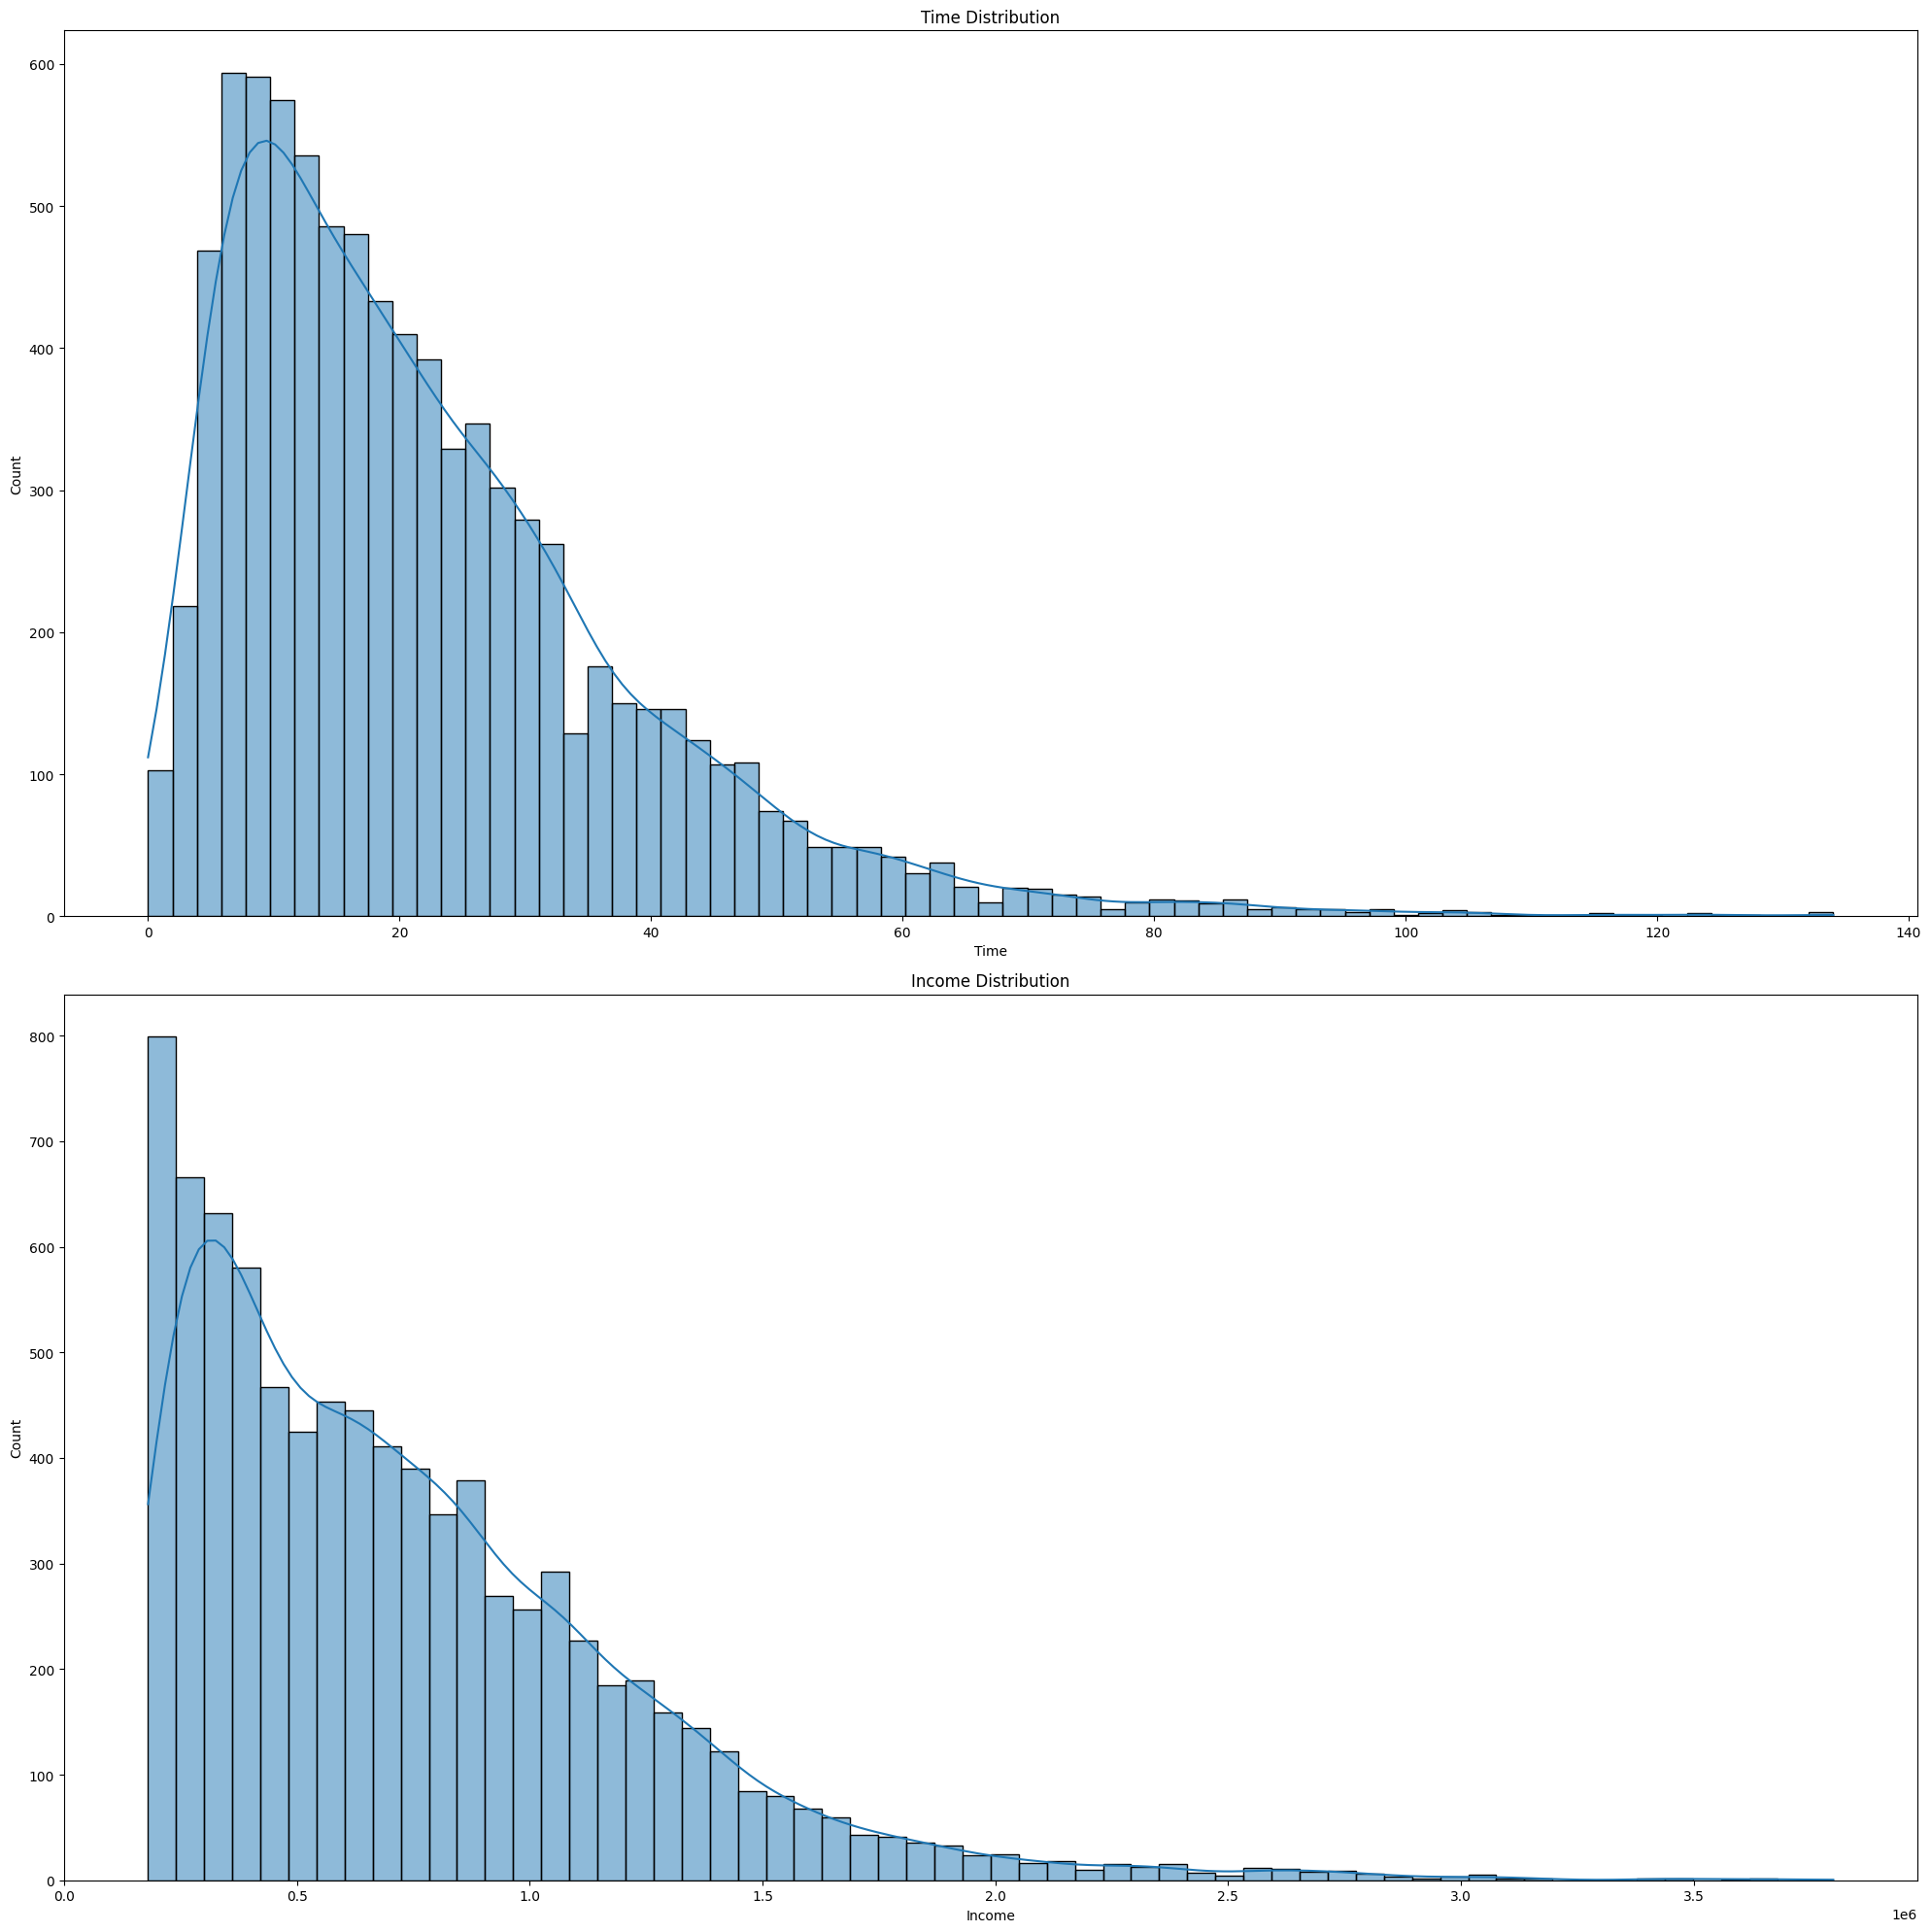

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots, arranged vertically
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Plot the distribution of the 'Time' variable with a KDE (Kernel Density Estimate)
sns.histplot(train_df['Time'], kde=True, ax=axes[0])
axes[0].set_title('Time Distribution')

# Plot the distribution of the 'Income' variable with a KDE (Kernel Density Estimate)
sns.histplot(train_df['Income'], kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

# Display the plots
plt.tight_layout()  # Adjusts the layout so that plots do not overlap
plt.show()

In [103]:
import pandas as pd

def add_end_at_to_dataframe(df):
    """
    Adds an 'End_at' column to the dataframe by calculating the end time 
    based on the 'Created_at' time and 'Time' duration in minutes.
    """
    df['Created_at'] = pd.to_datetime(df['Created_at'])
    df['End_at'] = df['Created_at'] + pd.to_timedelta(df['Time'], unit='m')
    return df

def add_time_details(df, column):
    """
    Adds detailed time information columns to the dataframe based on the specified datetime column.
    Columns added: day of the week, hour, and minute.
    """
    df[column] = pd.to_datetime(df[column])
    df[f"Day_Of_Week_{column}"] = df[column].dt.dayofweek
    df[f"Hour_{column}"] = df[column].dt.hour
    df[f"Minute_{column}"] = df[column].dt.minute
    return df

def convert_day_number_to_persian(day_number):
    """
    Converts a day number (0-6) to its corresponding Persian name.
    """
    persian_days = ["دوشنبه", "سه شنبه", "چهارشنبه", "پنج شنبه", "جمعه", "شنبه", "یکشنبه"]
    return persian_days[day_number]

def is_weekend(day):
    """
    Checks if the given Persian day name corresponds to a weekend (Thursday or Friday).
    """
    return day in ["پنج شنبه", "جمعه"]

def calculate_average_traffic_quality(start_hour, end_hour, traffic_quality_index):
    """
    Calculates the average traffic quality index between the start and end hours.
    """
    if start_hour == end_hour:
        return traffic_quality_index[start_hour]
    else:
        if start_hour > 20 and end_hour < 6:
            hours = list(range(start_hour, 24)) + list(range(0, end_hour + 1))
        else:
            hours = list(range(start_hour, end_hour + 1))
        traffic_qualities = [traffic_quality_index[hour] for hour in hours]
        return sum(traffic_qualities) / len(traffic_qualities)

# Predefined traffic quality index for each hour of the day
traffic_quality_index = {
    0: 4,  1: 3,  2: 3,  3: 3,  4: 3,  5: 3,  6: 5,  7: 21,
    8: 40, 9: 31, 10: 40, 11: 40, 12: 40, 13: 42, 14: 43, 15: 45,
    16: 54, 17: 65, 18: 76, 19: 72, 20: 60, 21: 45, 22: 21, 23: 9,
    24: 4
}

# Apply functions to the dataframe
train_df = add_end_at_to_dataframe(train_df)
train_df = add_time_details(train_df, 'Created_at')
train_df = add_time_details(train_df, 'End_at')
train_df['Day_Of_Week_Created_at'] = train_df['Day_Of_Week_Created_at'].apply(convert_day_number_to_persian)
train_df['Day_Of_Week_End_at'] = train_df['Day_Of_Week_End_at'].apply(convert_day_number_to_persian)
train_df['Is_Weekend_Created_at'] = train_df['Day_Of_Week_Created_at'].apply(is_weekend)
train_df['Is_Weekend_End_at'] = train_df['Day_Of_Week_End_at'].apply(is_weekend)
train_df['Average_Traffic_Quality'] = train_df.apply(
    lambda x: calculate_average_traffic_quality(x['Hour_Created_at'], x['Hour_End_at'], traffic_quality_index), 
    axis=1
)

# Rename and reorder columns
train_df = train_df[[
    "ID", "UserID", "Origin", "Destination", "Time", "Income", "Comment", 
    "Hour_Created_at", "Minute_Created_at", "Hour_End_at", "Minute_End_at", 
    "Day_Of_Week_End_at", "Is_Weekend_End_at", "Average_Traffic_Quality", "Label"
]]
train_df.rename(columns={"Day_Of_Week_End_at": "Day_Of_Week", "Is_Weekend_End_at": "Is_Weekend"}, inplace=True)
train_df

/var/folders/27/vcly6t3j215ds8g6w8j2dvym0000gn/T/ipykernel_2222/3502451229.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={"Day_Of_Week_End_at": "Day_Of_Week", "Is_Weekend_End_at": "Is_Weekend"}, inplace=True)


,ID,UserID,Origin,Destination,Time,Income,Comment,Hour_Created_at,Minute_Created_at,Hour_End_at,Minute_End_at,Day_Of_Week,Is_Weekend,Average_Traffic_Quality,Label
0,1001034,1001513,1030,1030,9,230000,\n,10,7,10,16,شنبه,False,40.0,0
1,1005544,1001129,631,847,42,1060000,راننده بسیار مودب بود و خوشرو بود\n,12,15,12,57,دوشنبه,False,40.0,0
2,1000139,1004333,858,864,34,1250000,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,2,18,2,52,شنبه,False,3.0,0
3,1000560,1001673,593,846,14,660000,راننده به موقع رسید\n,6,0,6,14,شنبه,False,5.0,1
4,1008230,1002231,1018,1018,11,230000,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,16,31,16,42,سه شنبه,False,54.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1008378,1002173,846,608,31,770000,در خودروی ایشان برای مسافران کتاب جهت مطالعه و...,18,23,18,54,سه شنبه,False,76.0,0
8496,1006567,1003500,839,582,22,1110000,خیلی خوشحالم که این راننده مرا میبرد\n,3,53,4,15,سه شنبه,False,3.0,0
8497,1000341,1004087,1029,1030,7,420000,فوق العاده بود\n,4,17,4,24,شنبه,False,3.0,0
8498,1005068,1001042,602,611,15,590000,هیچ شکایتی ندارم، اما هیچ نظر مثبتی هم ندارم\n,8,55,9,10,دوشنبه,False,35.5,0


In [106]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased-sentiment-snappfood")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased-sentiment-snappfood")

# Define a function to calculate sentiment score
def get_sentiment_score(comment):
    if comment.strip() == '':
        return 0.5  # Neutral score for empty comments
    inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    scores = outputs.logits.detach().numpy()
    probabilities = np.exp(scores) / (1 + np.exp(scores))
    sentiment_score = probabilities[0][1]  # Probability of negative sentiment
    return float(sentiment_score)

# Apply the sentiment score function to the comments
train_df['Sentiment_Score'] = train_df['Comment'].apply(get_sentiment_score)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/var/folders/27/vcly6t3j215ds8g6w8j2dvym0000gn/T/ipykernel_2222/2706541773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sentiment_Score'] = train_df['Comment'].apply(get_sentiment_score)


In [108]:
train_df.to_csv('ML-Engineer_Task/task_train_with_sentiment.csv')

In [119]:
import pandas as pd

day_of_week_one_hot = {
    "شنبه": [0, 0, 0, 0, 0, 0, 1],
    "یکشنبه": [0, 0, 0, 0, 0, 1, 0],
    "دوشنبه": [0, 0, 0, 0, 1, 0, 0],
    "سه شنبه": [0, 0, 0, 1, 0, 0, 0],
    "چهارشنبه": [0, 0, 1, 0, 0, 0, 0],
    "پنج شنبه": [0, 1, 0, 0, 0, 0, 0],
    "جمعه": [1, 0, 0, 0, 0, 0, 0]
}

train_df = pd.read_csv('ML-Engineer_Task/task_train_with_sentiment.csv', index_col=0)
train_df.drop(columns="Comment", inplace=True)
train_df["is_origin_and_destination_same"] = train_df["Origin"] == train_df["Destination"]

# Adding new columns for each day of the week
days = ["شنبه", "یکشنبه", "دوشنبه", "سه شنبه", "چهارشنبه", "پنج شنبه", "جمعه"]
for i, day in enumerate(days):
    train_df[f'Day_{i}'] = train_df['Day_Of_Week'].apply(lambda x: day_of_week_one_hot[x][i])

# Convert boolean columns to integers
train_df["is_origin_and_destination_same"] = train_df["is_origin_and_destination_same"].astype(int)
train_df["Is_Weekend"] = train_df["Is_Weekend"].astype(int)

train_df

,ID,UserID,Origin,Destination,Time,Income,Hour_Created_at,Minute_Created_at,Hour_End_at,Minute_End_at,...,Label,Sentiment_Score,is_origin_and_destination_same,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1001034,1001513,1030,1030,9,230000,10,7,10,16,...,0,0.500000,1,0,0,0,0,0,0,1
1,1005544,1001129,631,847,42,1060000,12,15,12,57,...,0,0.078974,0,0,0,0,0,1,0,0
2,1000139,1004333,858,864,34,1250000,2,18,2,52,...,0,0.056381,0,0,0,0,0,0,0,1
3,1000560,1001673,593,846,14,660000,6,0,6,14,...,1,0.134372,0,0,0,0,0,0,0,1
4,1008230,1002231,1018,1018,11,230000,16,31,16,42,...,0,0.246126,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1008378,1002173,846,608,31,770000,18,23,18,54,...,0,0.427934,0,0,0,0,1,0,0,0
8496,1006567,1003500,839,582,22,1110000,3,53,4,15,...,0,0.060702,0,0,0,0,1,0,0,0
8497,1000341,1004087,1029,1030,7,420000,4,17,4,24,...,0,0.061404,0,0,0,0,0,0,0,1
8498,1005068,1001042,602,611,15,590000,8,55,9,10,...,0,0.847208,0,0,0,0,0,1,0,0


In [120]:
X = train_df.drop(columns=["ID", "Label", "Day_Of_Week"])
y = train_df["Label"]

In [136]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the extensive hyperparameters grid
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, ],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

# Set up StratifiedKFold
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup the GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=stratified_kf, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Save the best model
best_model = grid_search.best_estimator_
best_model.save_model('best_xgb_model.json')


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/sinakazemi/Desktop/Snapp_Task/Task/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:24:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sinakazemi/Desktop/Snapp_Task/Task/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:24:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sinakazemi/Desktop/Snapp_Task/Task/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:24:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sinakazemi/Desktop/Snapp_Task/Task/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:24:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

Best Parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
Best Score: 0.7608465954081011


In [137]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def report_metrics(y_true, y_pred_prob):
    # Binarize the predicted probabilities to get the predicted labels
    threshold = 0.5
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calculate various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Create a results dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    return metrics

# Example usage with your best model
y_pred_prob = best_model.predict_proba(X)[:, 1]
metrics = report_metrics(y, y_pred_prob)

Accuracy: 0.9945
Precision: 1.0000
Recall: 0.7513
F1 Score: 0.8580
ROC-AUC: 1.0000
Confusion Matrix:
[[8311    0]
 [  47  142]]
